In [1]:
import numpy as np
import pandas as pd

In [2]:


from scipy import stats
import statsmodels.api as sm   # regression

import matplotlib.pyplot as plt


C:\Users\sonww\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
sp500 = pd.read_csv('SP500_DailyIndex-1.csv', parse_dates= ['Date'])

In [4]:
sp500.set_index('Date',inplace=True)

In [5]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,59.910000,3990000
1960-01-05,60.389999,60.389999,60.389999,60.389999,60.389999,3710000
1960-01-06,60.130001,60.130001,60.130001,60.130001,60.130001,3730000
1960-01-07,59.689999,59.689999,59.689999,59.689999,59.689999,3310000
1960-01-08,59.500000,59.500000,59.500000,59.500000,59.500000,3290000


In [6]:
sp500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [7]:
sp500.head()

,Adj Close
Date,
1960-01-04,59.910000
1960-01-05,60.389999
1960-01-06,60.130001
1960-01-07,59.689999
1960-01-08,59.500000


In [8]:
sp500.columns = ['sp500']

In [9]:
sp500['sp500ret'] = (sp500['sp500'] / sp500['sp500'].shift(1))  -1

In [10]:
sp500.dropna(inplace=True)

In [11]:
ff3 = pd.read_csv('FF3Factors_Daily-1.csv', parse_dates= ['Date'])

In [12]:
ff3.set_index('Date', inplace = True)

In [13]:
df = sp500.join(ff3, how= 'inner')

In [14]:
df.head()

,sp500,sp500ret,Mkt-RF,SMB,HML,RF
Date,,,,,,
1960-01-05,60.389999,0.008012,0.78,-0.40,0.54,0.017
1960-01-06,60.130001,-0.004305,-0.47,0.13,0.36,0.017
1960-01-07,59.689999,-0.007318,-0.65,0.37,0.08,0.017
1960-01-08,59.500000,-0.003183,-0.33,0.18,0.10,0.017
1960-01-11,58.770000,-0.012269,-1.15,0.48,0.32,0.017


In [15]:
df['exret'] = df['sp500ret'] - df['RF'] / 100

In [16]:
df.head()

,sp500,sp500ret,Mkt-RF,SMB,HML,RF,exret
Date,,,,,,,
1960-01-05,60.389999,0.008012,0.78,-0.40,0.54,0.017,0.007842
1960-01-06,60.130001,-0.004305,-0.47,0.13,0.36,0.017,-0.004475
1960-01-07,59.689999,-0.007318,-0.65,0.37,0.08,0.017,-0.007488
1960-01-08,59.500000,-0.003183,-0.33,0.18,0.10,0.017,-0.003353
1960-01-11,58.770000,-0.012269,-1.15,0.48,0.32,0.017,-0.012439


In [29]:
df1 = df.loc['1965-01-01':'2017-12-31']

In [17]:
cumret = pd.DataFrame((1+df['exret']).resample('M').prod())

In [18]:
cumret.columns = ['monthly_cumret']

In [19]:
cumret.head()

,monthly_cumret
Date,
1960-01-31,0.925220
1960-02-29,1.006350
1960-03-31,0.982703
1960-04-30,0.980507
1960-05-31,1.024057


In [20]:
df['cumprod'] = (1+ df['exret'] / 100)

In [21]:
def cumretfunc(df): 
    v=(df.prod())-1
    return v

In [22]:
# rollingret = pd.rolling_apply(monthlydf, 12, lambda x: np.prod(x))

In [23]:
cumret['rolling12_cumret'] = cumret.rolling(window=12,center=False).apply(lambda x: cumretfunc(x))

In [24]:
cumret.head(15)

,monthly_cumret,rolling12_cumret
Date,,
1960-01-31,0.925220,NaN
1960-02-29,1.006350,NaN
1960-03-31,0.982703,NaN
1960-04-30,0.980507,NaN
1960-05-31,1.024057,NaN
1960-06-30,1.017061,NaN
1960-07-31,0.973862,NaN
1960-08-31,1.024472,NaN
1960-09-30,0.938025,NaN


In [25]:
# test to see if this is right

cumret['monthly_cumret'].iloc[0:12].prod()

0.94477671173497924

In [31]:
cumret1 = cumret.loc['1965-01-01':'2017-12-31']

In [26]:
len(df)

14598

In [32]:
delta = 60/61

In [39]:
lst = []
for i in range(len(df1)):
    reverse_index = len(df1) - i
    weighted_r = ((1 - delta) ** reverse_index) * df1['exret']
    mean_r = weighted_r.sum()
    dev_sq = ((1 - delta) ** reverse_index)  *  (df1['exret'] - mean_r)
    vol = (dev_sq.sum() * 261) ** 0.5
    lst.append(vol)
    
volatility = pd.DataFrame(lst)

In [42]:
len(volatility)

13341

In [43]:
volatility.index = df1.index

In [47]:
volatility.columns = ['volatility']

In [51]:
final =df1.join(volatility, how='inner')

In [52]:
final.head()

,sp500,sp500ret,Mkt-RF,SMB,HML,RF,exret,cumprod,volatility
Date,,,,,,,,,
1965-01-04,84.230003,-0.006136,-0.45,0.71,-0.08,0.014,-0.006276,0.999937,0j
1965-01-05,84.629997,0.004749,0.49,0.39,-0.10,0.014,0.004609,1.000046,0j
1965-01-06,84.889999,0.003072,0.34,0.19,0.44,0.014,0.002932,1.000029,0j
1965-01-07,85.260002,0.004359,0.40,0.07,0.18,0.014,0.004219,1.000042,0j
1965-01-08,85.370003,0.001290,0.17,0.18,-0.20,0.014,0.001150,1.000012,0j


C:\Users\sonww\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


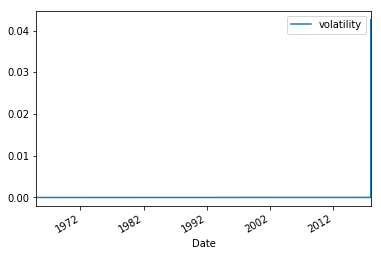

In [55]:
%matplotlib inline
volatility.plot()